In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import numpy as np
import cv2
from skimage import exposure
from sklearn.model_selection import train_test_split

# Configurações
IMG_SIZE = 128
BASE_DIR = '/content/drive/MyDrive/CattleImageRepository (1)'

def load_and_preprocess_data(base_dir, subdirs):
    X, y = [], []
    for subdir in subdirs:
        if subdir == 'G3/30-07/frames_juntos':
            # Todas as imagens estão na mesma pasta
            full_path = os.path.join(base_dir, subdir)
            x_files = sorted([f for f in os.listdir(full_path) if f.endswith(('x.png', 'x1.png', 'x.jpeg', 'x1.jpeg'))])
            image_count = 0  # Contador de imagens

            for x_file in x_files:
                y_file = x_file.replace('x.', 'y.').replace('x1.', 'y1.')
                if os.path.exists(os.path.join(full_path, y_file)):
                    img = cv2.imread(os.path.join(full_path, x_file))
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
                    X.append(img)

                    mask = cv2.imread(os.path.join(full_path, y_file))
                    mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
                    mask = cv2.resize(mask, (IMG_SIZE, IMG_SIZE))
                    y.append(mask)

                    image_count += 1

            print(f"{subdir}: {image_count} imagens processadas.")

        else:

            full_path = os.path.join(base_dir, *subdir.split('/'))
            x_dir = os.path.join(full_path, 'X')
            y_dir = os.path.join(full_path, 'Y')

            if not os.path.exists(y_dir):
                y_dir = os.path.join(full_path, 'y')

            if not os.path.exists(x_dir):
                x_dir = os.path.join(full_path, 'x1_files')
                y_dir = os.path.join(full_path, 'y1_files')

            if os.path.exists(x_dir) and os.path.exists(y_dir):
                x_files = sorted([f for f in os.listdir(x_dir) if f.endswith(('x.png', 'x1.png', 'x.jpeg', 'x1.jpeg'))])
                image_count = 0  # Contador de imagens

                for x_file in x_files:
                    y_file = x_file.replace('x.', 'y.').replace('x1.', 'y1.')
                    if os.path.exists(os.path.join(y_dir, y_file)):
                        img = cv2.imread(os.path.join(x_dir, x_file))
                        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
                        X.append(img)

                        mask = cv2.imread(os.path.join(y_dir, y_file))
                        mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
                        mask = cv2.resize(mask, (IMG_SIZE, IMG_SIZE))
                        y.append(mask)

                        image_count += 1  # Incrementa o contador

                x_dir = os.path.join(full_path, 'x2_files')
                y_dir = os.path.join(full_path, 'y2_files')

                if os.path.exists(x_dir) and os.path.exists(y_dir):

                  x_files = sorted([f for f in os.listdir(x_dir) if f.endswith(('x.png', 'x1.png', 'x.jpeg', 'x1.jpeg'))])
                  image_count = 0  # Contador de imagens

                  for x_file in x_files:
                      y_file = x_file.replace('x.', 'y.').replace('x1.', 'y1.')
                      if os.path.exists(os.path.join(y_dir, y_file)):
                          img = cv2.imread(os.path.join(x_dir, x_file))
                          img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                          img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
                          X.append(img)

                          mask = cv2.imread(os.path.join(y_dir, y_file))
                          mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
                          mask = cv2.resize(mask, (IMG_SIZE, IMG_SIZE))
                          y.append(mask)

                          image_count += 1  # Incrementa o contador

                print(f"{subdir}: {image_count} imagens processadas.")
            else:
                print(f"Erro: Pastas 'X' ou 'Y/y' não encontradas em {subdir}")

    return np.array(X), np.array(y)

# Lista de subdiretórios a serem processados
subdirs = [
    'G1/01-08-2024', 'G1/08-08-2024',
    'G2/29-07/00000000196000500', 'G2/29-07/00000000196000400',
    'G2/06-08/Video 1', 'G2/06-08/Video 2',
    'G3/30-07/frames_juntos', 'G3/30-07',
    'G4/02-08'
]

X, y = load_and_preprocess_data(BASE_DIR, subdirs)
X = np.expand_dims(X, axis=-1)
y = np.expand_dims(y, axis=-1)

G1/01-08-2024: 580 imagens processadas.
G1/08-08-2024: 137 imagens processadas.
G2/29-07/00000000196000500: 218 imagens processadas.
G2/29-07/00000000196000400: 219 imagens processadas.
G2/06-08/Video 1: 494 imagens processadas.
G2/06-08/Video 2: 63 imagens processadas.
G3/30-07/frames_juntos: 23 imagens processadas.
G3/30-07: 111 imagens processadas.
Erro: Pastas 'X' ou 'Y/y' não encontradas em G4/02-08


(128, 128, 3)


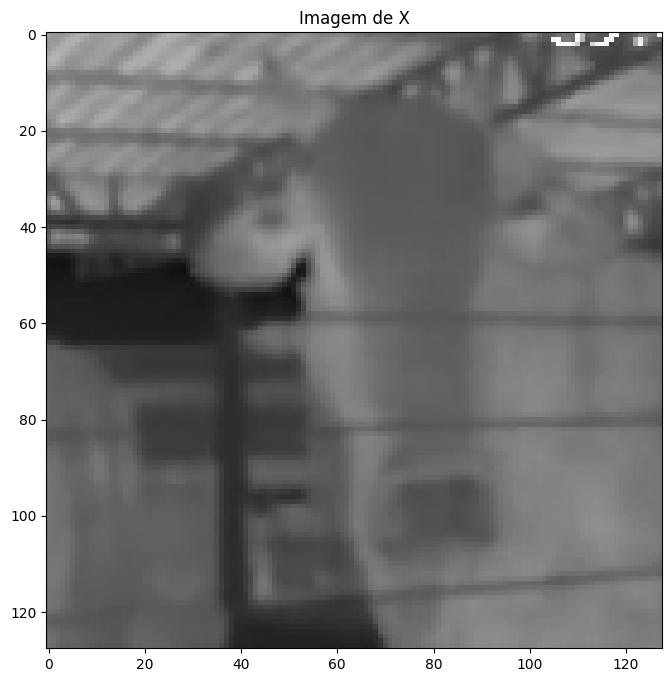

In [3]:
import matplotlib.pyplot as plt

image = X[np.random.randint(0, X.shape[0])]

if image.shape[-1] == 1:
    image = image.squeeze()

print(image.shape)

plt.figure(figsize=(8, 8))
plt.imshow(image)
plt.title(f'Imagem de X')
plt.show()

In [4]:
X.shape, y.shape

((2454, 128, 128, 3, 1), (2454, 128, 128, 3, 1))

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
print("Shape de X_train:", X_train.shape)
print("Shape de X_test:", X_test.shape)
print("Shape de y_train:", y_train.shape)
print("Shape de y_test:", y_test.shape)

Shape de X_train: (1963, 128, 128, 3, 1)
Shape de X_test: (491, 128, 128, 3, 1)
Shape de y_train: (1963, 128, 128, 3, 1)
Shape de y_test: (491, 128, 128, 3, 1)


In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

def apply_data_augmentation(X, y, variations=7):

    X_augmented = []
    y_augmented = []

    datagen = ImageDataGenerator(
        rotation_range=25,
        zoom_range=0.15,
        width_shift_range=0.3,
        height_shift_range=0.3,
        brightness_range=[0.5, 1.5],
        channel_shift_range=50,
        horizontal_flip=True,
        vertical_flip=False,
        fill_mode='nearest'
    )

    for i in range(X.shape[0]):

        image = X[i]
        mask = y[i]

        if image.ndim == 4:
            image = image.squeeze()
        if mask.ndim == 4:
            mask = mask.squeeze()

        for j in range(variations):
            params = datagen.get_random_transform(image.shape)

            augmented_image = datagen.apply_transform(image, params)
            augmented_mask = datagen.apply_transform(mask, params)

            if augmented_image.max() > 1:
                augmented_image = augmented_image / 255.0

            if augmented_mask.max() > 1:
                augmented_mask = augmented_mask / 255.0

            # plt.imshow(augmented_image)
            # plt.axis('off')
            # plt.show()

            # plt.imshow(augmented_mask)
            # plt.axis('off')
            # plt.show()

            X_augmented.append(augmented_image)
            y_augmented.append(augmented_mask)

    return np.array(X_augmented), np.array(y_augmented)

X_train_augmented, y_train_augmented = apply_data_augmentation(X_train, y_train)

In [8]:
X_train_augmented.shape, y_train_augmented.shape

((13741, 128, 128, 3), (13741, 128, 128, 3))

In [9]:
def transform_dimensions(X, y, variations=3, normalize=False):
    X_transform = []
    y_transform = []

    for i in range(X.shape[0]):
        image = X[i]
        mask = y[i]

        if image.ndim == 4:
            image = image.squeeze()
        if mask.ndim == 4:
            mask = mask.squeeze()

        if normalize:
          image = image / 255.0
          mask = mask / 255.0

        X_transform.append(image)
        y_transform.append(mask)

    return np.array(X_transform), np.array(y_transform)

X_train_transformed, y_train_transformed = transform_dimensions(X_train_augmented, y_train_augmented)
X_test_transformed, y_teste_transformed = transform_dimensions(X_test, y_test)

In [10]:
X_train_augmented = np.concatenate((X_train_transformed, X_train_augmented), axis=0)
y_train_augmented = np.concatenate((y_train_transformed, y_train_augmented), axis=0)

(-0.5, 127.5, 127.5, -0.5)

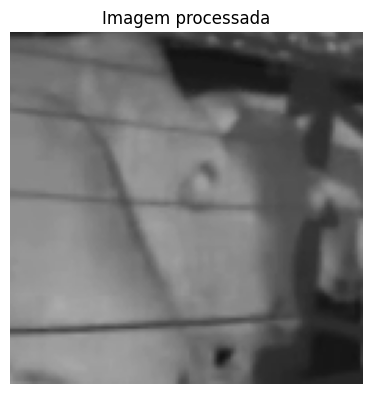

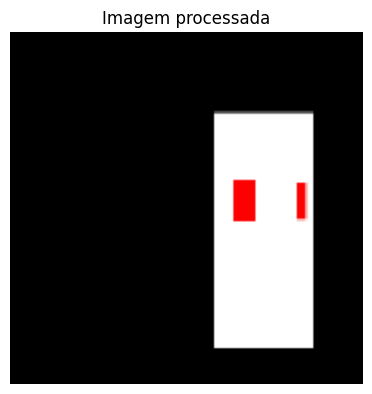

In [11]:
index = np.random.randint(0, X_test.shape[0])

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(X_test_transformed[index])
plt.title("Imagem processada")
plt.axis('off')

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(y_teste_transformed[index])
plt.title("Imagem processada")
plt.axis('off')

In [12]:
X_train_augmented.shape, y_train_augmented.shape

((27482, 128, 128, 3), (27482, 128, 128, 3))

In [13]:
X_test_transformed.shape, y_teste_transformed.shape

((491, 128, 128, 3), (491, 128, 128, 3))

In [ ]:
import numpy as np

def transform_image(image):
    preto = 0
    branco = 1

    mask_gray = (image[:, :, 0] == image[:, :, 1]) & (image[:, :, 1] == image[:, :, 2])
    image[mask_gray] = branco
    mask_not_white = (image != branco).any(axis=-1)
    image[mask_not_white] = preto

    return image

y_train_augmented_transformed = np.array([transform_image(img) for img in y_train_augmented])

In [ ]:
def process_image_test(image):
    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    lower_red1 = np.array([0, 100, 100])
    upper_red1 = np.array([10, 255, 255])
    lower_red2 = np.array([160, 100, 100])
    upper_red2 = np.array([179, 255, 255])

    mask1 = cv2.inRange(hsv, lower_red1, upper_red1)
    mask2 = cv2.inRange(hsv, lower_red2, upper_red2)

    mask = mask1 + mask2

    white_image = np.ones_like(image) * 255

    result = np.where(mask[:,:,None] == 255, 0, white_image)

    return result

In [ ]:
y_test_transformed = np.array([process_image_y(img) for img in y_teste_transformed])

(-0.5, 127.5, 127.5, -0.5)

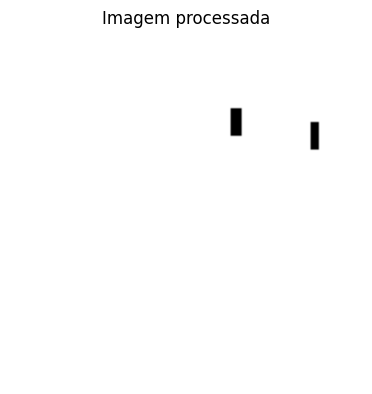

In [ ]:
index = np.random.randint(0, y_test_transformed.shape[0])

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(y_test_transformed[index])
plt.title("Imagem processada")
plt.axis('off')

In [ ]:
import numpy as np

def prepare_data(X, y):
    threshold = 0.5
    y_binary = np.any(y > threshold, axis=-1).astype(np.float32)

    y_3channels = np.repeat(y_binary[..., np.newaxis], 3, axis=-1)

    if X.shape[-1] == 1:
        X_3channels = np.repeat(X, 3, axis=-1)
    else:
        X_3channels = X

    return X_3channels, y_3channels

def prepare_data_255(X, y):
    threshold = 128

    y_binary = np.any(y > threshold, axis=-1).astype(np.uint8)

    y_3channels = np.repeat(y_binary[..., np.newaxis], 3, axis=-1) * 255

    if X.shape[-1] == 1:
        X_3channels = np.repeat(X, 3, axis=-1)
    else:
        X_3channels = X

    return X_3channels, y_3channels

X_train_final, y_train_final = prepare_data(X_train_augmented, y_train_augmented_transformed)
X_test_final, y_test_final = prepare_data_255(X_test_transformed, y_test_transformed)

(-0.5, 127.5, 127.5, -0.5)

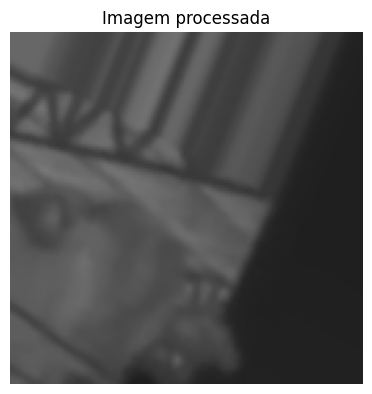

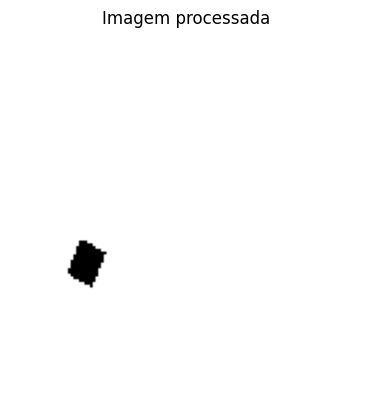

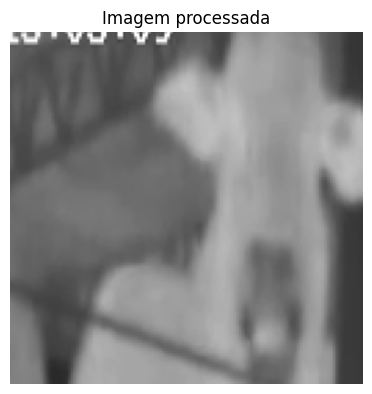

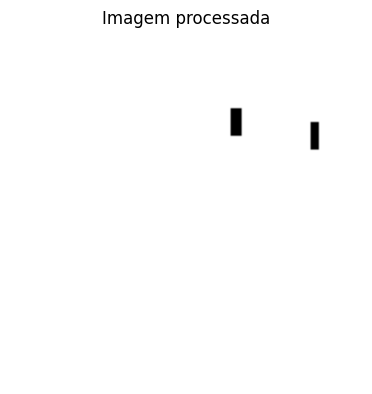

In [ ]:
index_train = np.random.randint(0, X_test_final.shape[0])

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(X_train_final[index])
plt.title("Imagem processada")
plt.axis('off')

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(y_train_final[index])
plt.title("Imagem processada")
plt.axis('off')

index_test = np.random.randint(0, X_test_final.shape[0])

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(X_test_final[index])
plt.title("Imagem processada")
plt.axis('off')

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(y_test_final[index])
plt.title("Imagem processada")
plt.axis('off')

In [ ]:
X_train_prepared.shape, y_train_prepared.shape

((7852, 128, 128, 3), TensorShape([7852, 128, 128, 1]))

In [ ]:
X_test_prepared.shape, y_test_prepared.shape

((491, 128, 128, 3), (491, 128, 128, 3))

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.backend as K

def cluster_aware_focal_loss(alpha=0.25, gamma=2, spatial_weight=1):
    def loss(y_true, y_pred):
        epsilon = K.epsilon()
        y_pred = K.clip(y_pred, epsilon, 1. - epsilon)

        # Focal Loss
        focal_loss = -alpha * K.pow(1 - y_pred, gamma) * y_true * K.log(y_pred) - \
                     (1 - alpha) * K.pow(y_pred, gamma) * (1 - y_true) * K.log(1 - y_pred)

        # Cluster awareness
        height, width = K.int_shape(y_pred)[1:3]
        y_coords, x_coords = tf.meshgrid(tf.range(height, dtype=tf.float32),
                                         tf.range(width, dtype=tf.float32),
                                         indexing='ij')
        coords = tf.stack([y_coords, x_coords], axis=-1)

        def calculate_centroid(mask):
            total_mass = K.sum(mask, axis=[1, 2]) + epsilon
            weighted_y = K.sum(y_coords[..., tf.newaxis] * mask, axis=[1, 2]) / total_mass
            weighted_x = K.sum(x_coords[..., tf.newaxis] * mask, axis=[1, 2]) / total_mass
            return tf.stack([weighted_y, weighted_x], axis=-1)

        true_centroids = calculate_centroid(y_true)
        pred_centroids = calculate_centroid(y_pred)

        centroid_distance = K.sqrt(K.sum(K.square(true_centroids - pred_centroids), axis=-1))

        # Penalize based on distance from true centroid
        pixel_distances = K.sqrt(K.sum(K.square(coords[..., tf.newaxis, :] - true_centroids[:, tf.newaxis, tf.newaxis, :]), axis=-1))
        distance_penalty = pixel_distances * K.abs(y_true - y_pred)

        total_loss = focal_loss + spatial_weight * distance_penalty

        return K.mean(total_loss)

    return loss

def conv_block(input_tensor, num_filters):
    x = Conv2D(num_filters, 3, padding='same', use_bias=False)(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    return x

def compact_unet(input_size=(128, 128, 3)):
    inputs = Input(input_size)

    # Encoder (Downsampling)
    conv1 = conv_block(inputs, 32)   # Aumentado de 16 para 64 filtros
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = conv_block(pool1, 64)   # Aumentado de 32 para 128 filtros
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = conv_block(pool2, 128)   # Nova camada, 256 filtros
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    # Bridge
    conv4 = conv_block(pool3, 256)   # Aumentado de 64 para 512 filtros

    # Decoder (Upsampling)
    up5 = UpSampling2D(size=(2, 2))(conv4)
    up5 = concatenate([up5, conv3])
    conv5 = conv_block(up5, 128)     # Nova camada, 256 filtros

    up6 = UpSampling2D(size=(2, 2))(conv5)
    up6 = concatenate([up6, conv2])
    conv6 = conv_block(up6, 64)     # Aumentado de 32 para 128 filtros

    up7 = UpSampling2D(size=(2, 2))(conv6)
    up7 = concatenate([up7, conv1])
    conv7 = conv_block(up7, 32)      # Aumentado de 16 para 64 filtros

    outputs = Conv2D(3, 1, activation='sigmoid')(conv7)

    model = Model(inputs=inputs, outputs=outputs)
    return model

# Create and compile the model
model = compact_unet()
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss=cluster_aware_focal_loss(),
              metrics=['accuracy'])

model.summary()

# Verificar as formas dos dados
print("X_train_final shape:", X_train_final.shape)
print("y_train_final shape:", y_train_final.shape)

# Treinamento do modelo
history = model.fit(
    X_train_final, y_train_final,
    batch_size=32,
    epochs=10,
    validation_split=0.2,
    callbacks=[
        tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.2, patience=5, min_lr=1e-7, mode='max'),
        tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=15, restore_best_weights=True, mode='max'),
        tf.keras.callbacks.ModelCheckpoint('unet_boi_olhos_compact.h5', save_best_only=True, monitor='val_accuracy', mode='max')
    ]
)

model.save('unet_boi_olhos_compact.h5')

Model: "model_31"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_33 (InputLayer)       [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 conv2d_212 (Conv2D)         (None, 128, 128, 32)         864       ['input_33[0][0]']            
                                                                                                  
 batch_normalization_184 (B  (None, 128, 128, 32)         128       ['conv2d_212[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_184 (Activation  (None, 128, 128, 32)         0         ['batch_normalization_1

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


688/688 [==============================] - 883s 1s/step - loss: 4.3433 - accuracy: 0.9664 - val_loss: 3.1103 - val_accuracy: 0.9940 - lr: 1.0000e-04
Epoch 3/10
688/688 [==============================] - 878s 1s/step - loss: 2.1487 - accuracy: 0.9961 - val_loss: 1.6613 - val_accuracy: 0.9967 - lr: 1.0000e-04
Epoch 4/10
688/688 [==============================] - 872s 1s/step - loss: 1.2805 - accuracy: 0.9868 - val_loss: 1.0963 - val_accuracy: 0.9803 - lr: 1.0000e-04
Epoch 5/10
688/688 [==============================] - 886s 1s/step - loss: 0.9120 - accuracy: 0.9780 - val_loss: 0.9169 - val_accuracy: 0.9835 - lr: 1.0000e-04
Epoch 6/10
688/688 [==============================] - 890s 1s/step - loss: 0.7469 - accuracy: 0.9775 - val_loss: 0.7409 - val_accuracy: 0.9803 - lr: 1.0000e-04
Epoch 7/10
688/688 [==============================] - 878s 1s/step - loss: 0.6617 - accuracy: 0.9743 - val_loss: 0.6812 - val_accuracy: 0.9711 - lr: 1.0000e-04
Epoch 8/10
688/688 [==============================]

In [ ]:
X_train_final.shape, y_train_final.shape

((27482, 128, 128, 3), (27482, 128, 128, 3))

In [ ]:
def binarize_output(y_pred, threshold=0.5):
    return tf.cast(y_pred > threshold, tf.float32)

model = tf.keras.models.load_model('unet_boi_olhos_compact.h5',
                                   custom_objects={'loss': spatial_weighted_focal_loss()})

y_pred = model.predict(X_test_final)
y_pred_binary = binarize_output(y_pred)

16/16 [==============================] - 3s 177ms/step


16/16 [==============================] - 3s 186ms/step


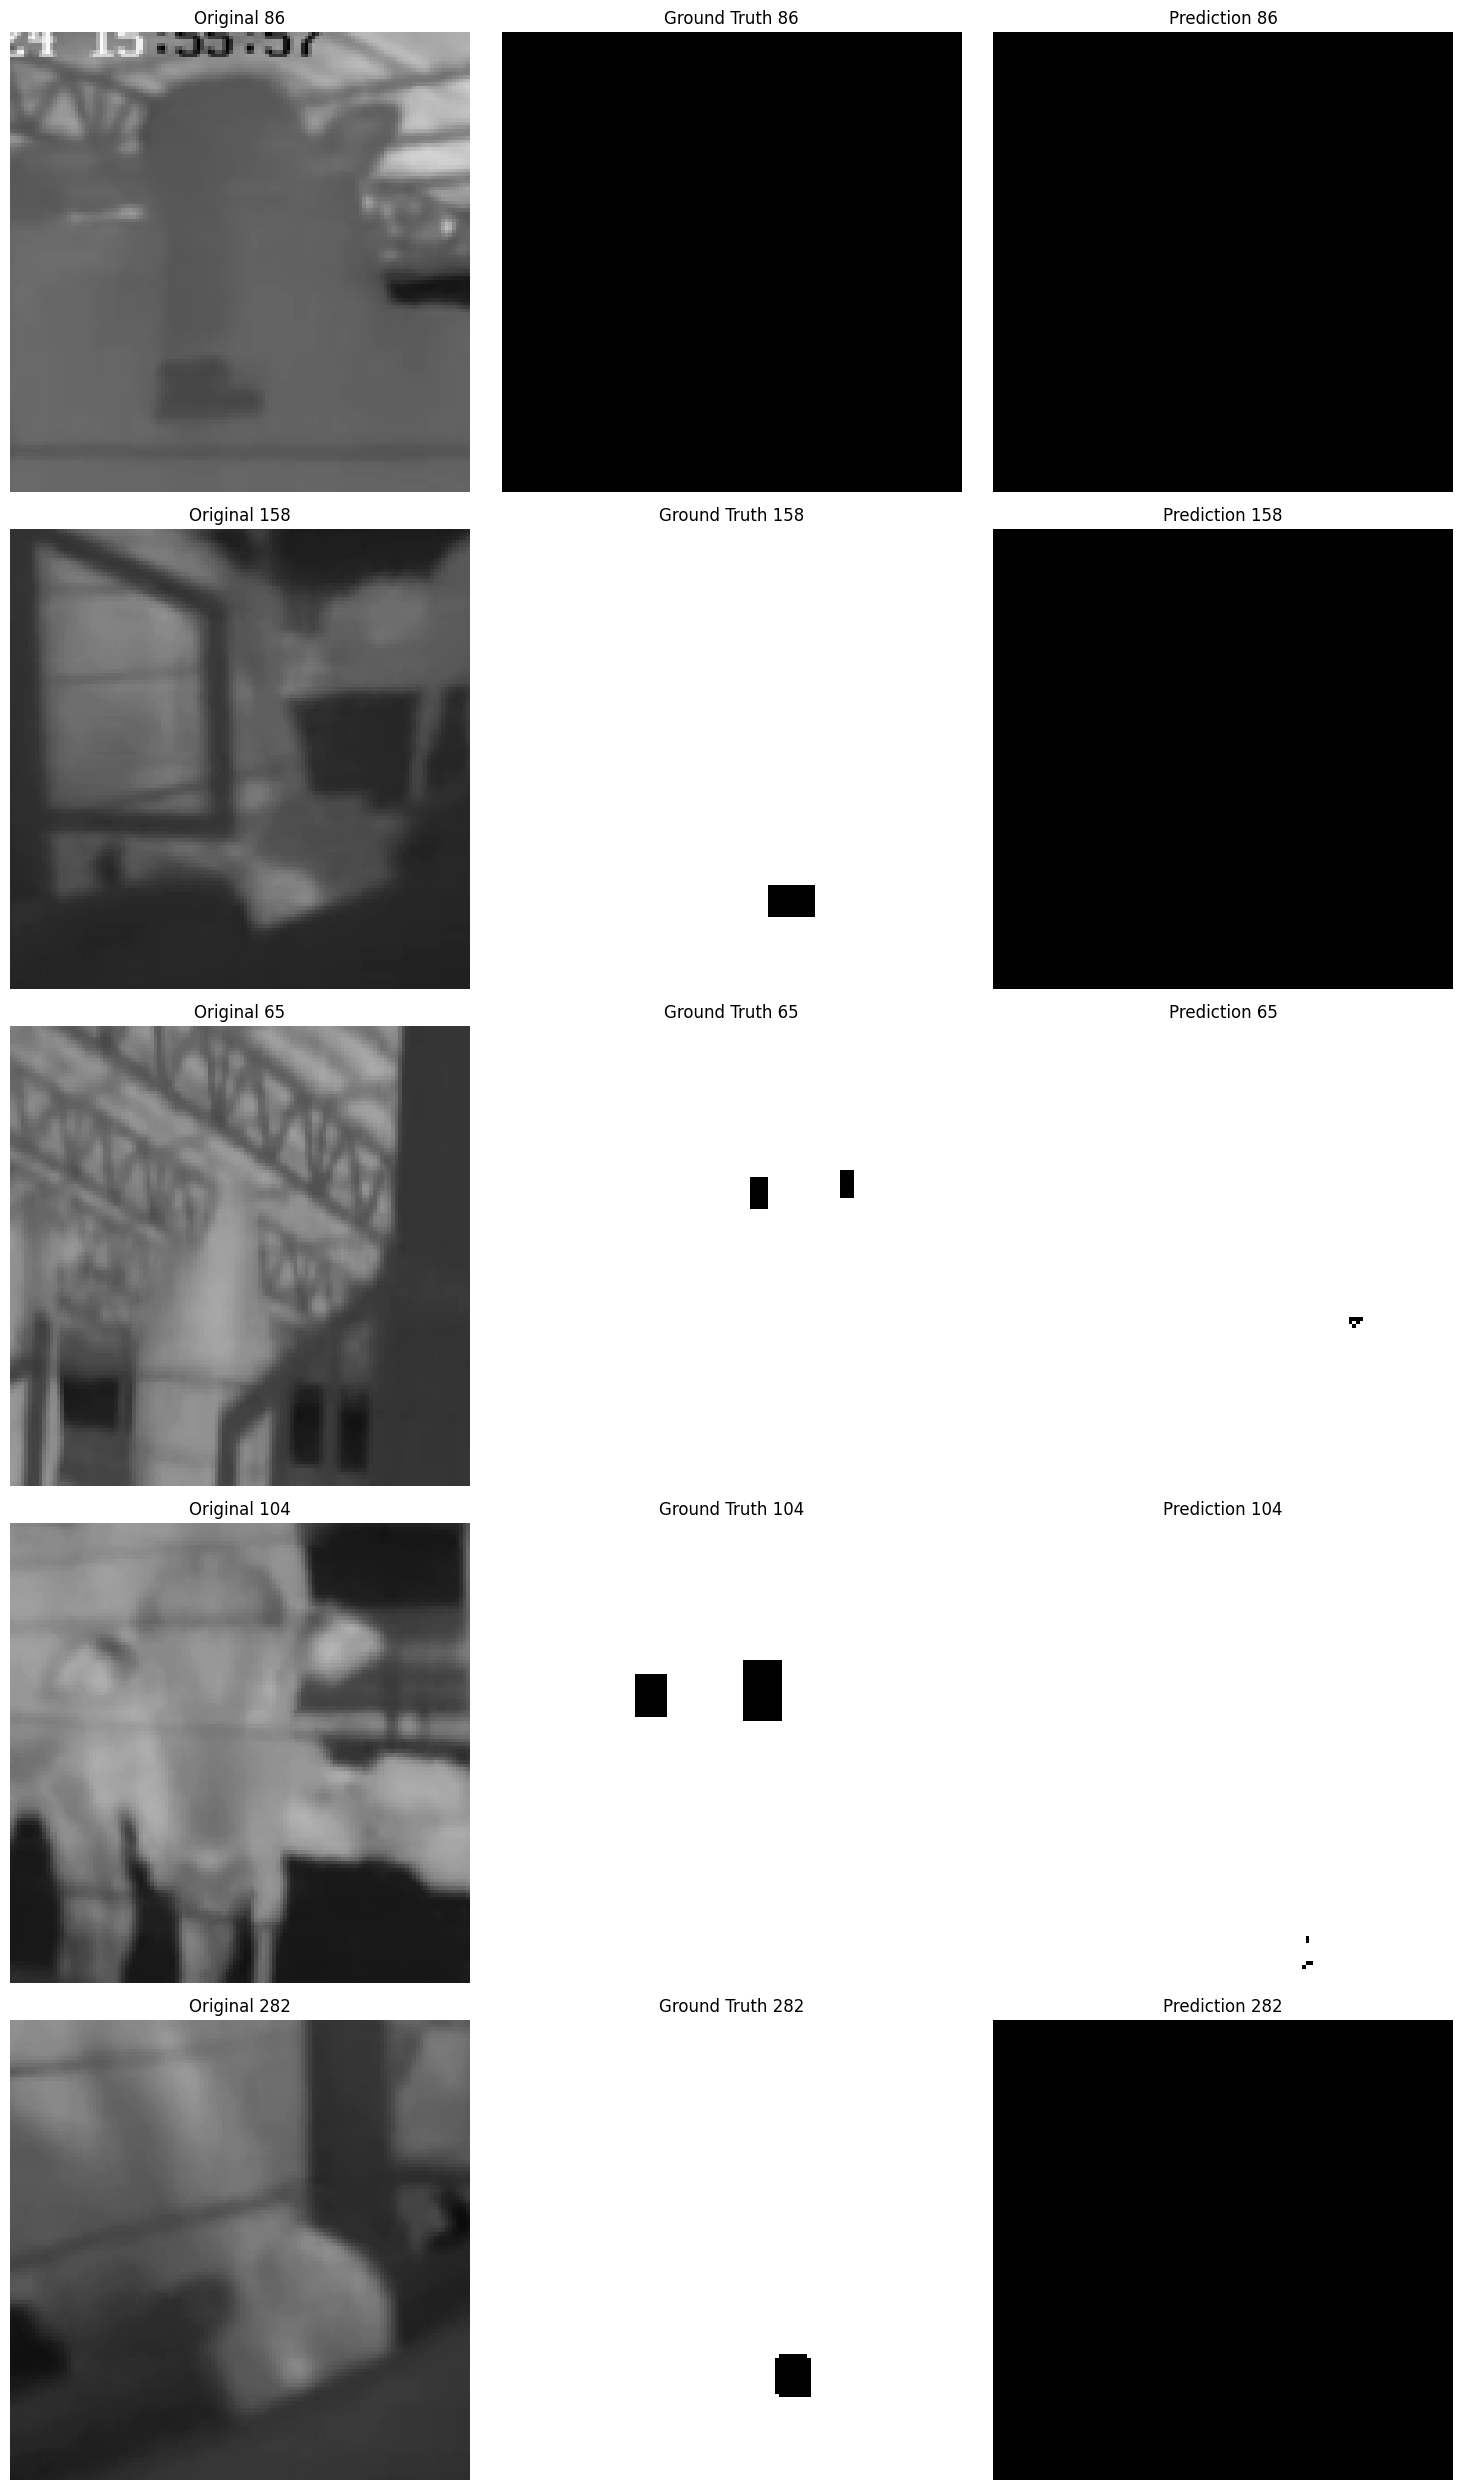

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def binarize_output(y_pred, threshold=0.5):
    # Assume que y_pred tem shape (batch_size, height, width, 3)
    # Converte para escala de cinza tomando a média dos canais
    y_pred_gray = tf.reduce_mean(y_pred, axis=-1)
    # Aplica o threshold
    return tf.cast(y_pred_gray > threshold, tf.float32)

def visualize_predictions(X_test, y_true, y_pred, num_samples=5):
    indices = np.random.choice(X_test.shape[0], num_samples, replace=False)

    plt.figure(figsize=(15, 5*num_samples))

    for i, idx in enumerate(indices):
        # Imagem original
        plt.subplot(num_samples, 3, i*3 + 1)
        plt.imshow(X_test[idx], cmap='gray')
        plt.title(f"Original {idx}")
        plt.axis('off')

        # Ground truth
        plt.subplot(num_samples, 3, i*3 + 2)
        plt.imshow(y_true[idx, ..., 0], cmap='gray')  # Assume que y_true é (batch, height, width, 1)
        plt.title(f"Ground Truth {idx}")
        plt.axis('off')

        # Predição
        plt.subplot(num_samples, 3, i*3 + 3)
        plt.imshow(y_pred[idx], cmap='gray')
        plt.title(f"Prediction {idx}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Carregue o modelo e faça as predições
model = tf.keras.models.load_model('unet_boi_olhos_compact.h5',
                                   custom_objects={'loss': spatial_weighted_focal_loss()})

y_pred = model.predict(X_test_final)
y_pred_binary = binarize_output(y_pred)

# Visualize os resultados
visualize_predictions(X_test_final, y_test_final, y_pred_binary)

16/16 [==============================] - 1s 66ms/step
(491, 128, 128, 1)


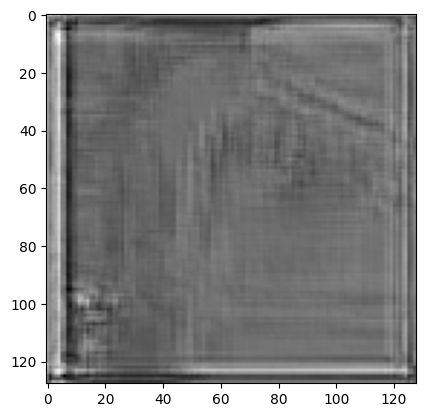

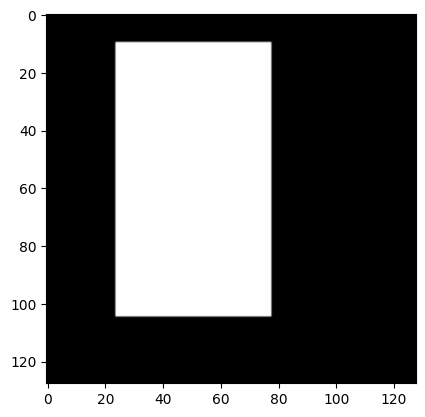

In [ ]:
import tensorflow as tf

# Carregar o modelo treinado
model = tf.keras.models.load_model('unet_boi_olhos_compact.h5',
                                   custom_objects={'loss': spatial_weighted_focal_loss()})

predictions = model.predict(X_test_prepared)

print(predictions.shape)  # Deve ser (491, 128, 128, 1)

import matplotlib.pyplot as plt

plt.imshow(predictions[0].squeeze(), cmap='gray')
plt.show()

plt.imshow(y_test_prepared[0].squeeze(), cmap='gray')
plt.show()

In [ ]:
X_test_prepared[0].shape

(128, 128, 3)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.backend as K

def dice_loss(y_true, y_pred):
    smooth = 1.
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return 1 - (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

def bce_dice_loss(y_true, y_pred):
    return tf.keras.losses.binary_crossentropy(y_true, y_pred) + dice_loss(y_true, y_pred)

def conv_block(input_tensor, num_filters):
    x = Conv2D(num_filters, 3, padding='same', use_bias=False)(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    return x

def compact_unet(input_size=(128, 128, 3)):
    inputs = Input(input_size)

    # Encoder (Downsampling)
    conv1 = conv_block(inputs, 32)   # Aumentado de 16 para 64 filtros
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = conv_block(pool1, 64)   # Aumentado de 32 para 128 filtros
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = conv_block(pool2, 128)   # Nova camada, 256 filtros
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    # Bridge
    conv4 = conv_block(pool3, 256)   # Aumentado de 64 para 512 filtros

    # Decoder (Upsampling)
    up5 = UpSampling2D(size=(2, 2))(conv4)
    up5 = concatenate([up5, conv3])
    conv5 = conv_block(up5, 128)     # Nova camada, 256 filtros

    up6 = UpSampling2D(size=(2, 2))(conv5)
    up6 = concatenate([up6, conv2])
    conv6 = conv_block(up6, 64)     # Aumentado de 32 para 128 filtros

    up7 = UpSampling2D(size=(2, 2))(conv6)
    up7 = concatenate([up7, conv1])
    conv7 = conv_block(up7, 32)      # Aumentado de 16 para 64 filtros

    outputs = Conv2D(3, 1, activation='sigmoid')(conv7)

    model = Model(inputs=inputs, outputs=outputs)
    return model

# Create and compile the model
model = compact_unet()
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss=cluster_aware_focal_loss(),
              metrics=['accuracy'])

model.summary()

# Verificar as formas dos dados
print("X_train_final shape:", X_train_final.shape)
print("y_train_final shape:", y_train_final.shape)

# Treinamento do modelo
history = model.fit(
    X_train_final, y_train_final,
    batch_size=32,
    epochs=10,
    validation_split=0.2,
    callbacks=[
        tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.2, patience=5, min_lr=1e-7, mode='max'),
        tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=15, restore_best_weights=True, mode='max'),
        tf.keras.callbacks.ModelCheckpoint('unet_boi_olhos_compact.h5', save_best_only=True, monitor='val_accuracy', mode='max')
    ]
)

model.save('unet_boi_olhos_compact_loss_2.h5')

Model: "model_32"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_34 (InputLayer)       [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 conv2d_220 (Conv2D)         (None, 128, 128, 32)         864       ['input_34[0][0]']            
                                                                                                  
 batch_normalization_191 (B  (None, 128, 128, 32)         128       ['conv2d_220[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_191 (Activation  (None, 128, 128, 32)         0         ['batch_normalization_1

16/16 [==============================] - 3s 179ms/step


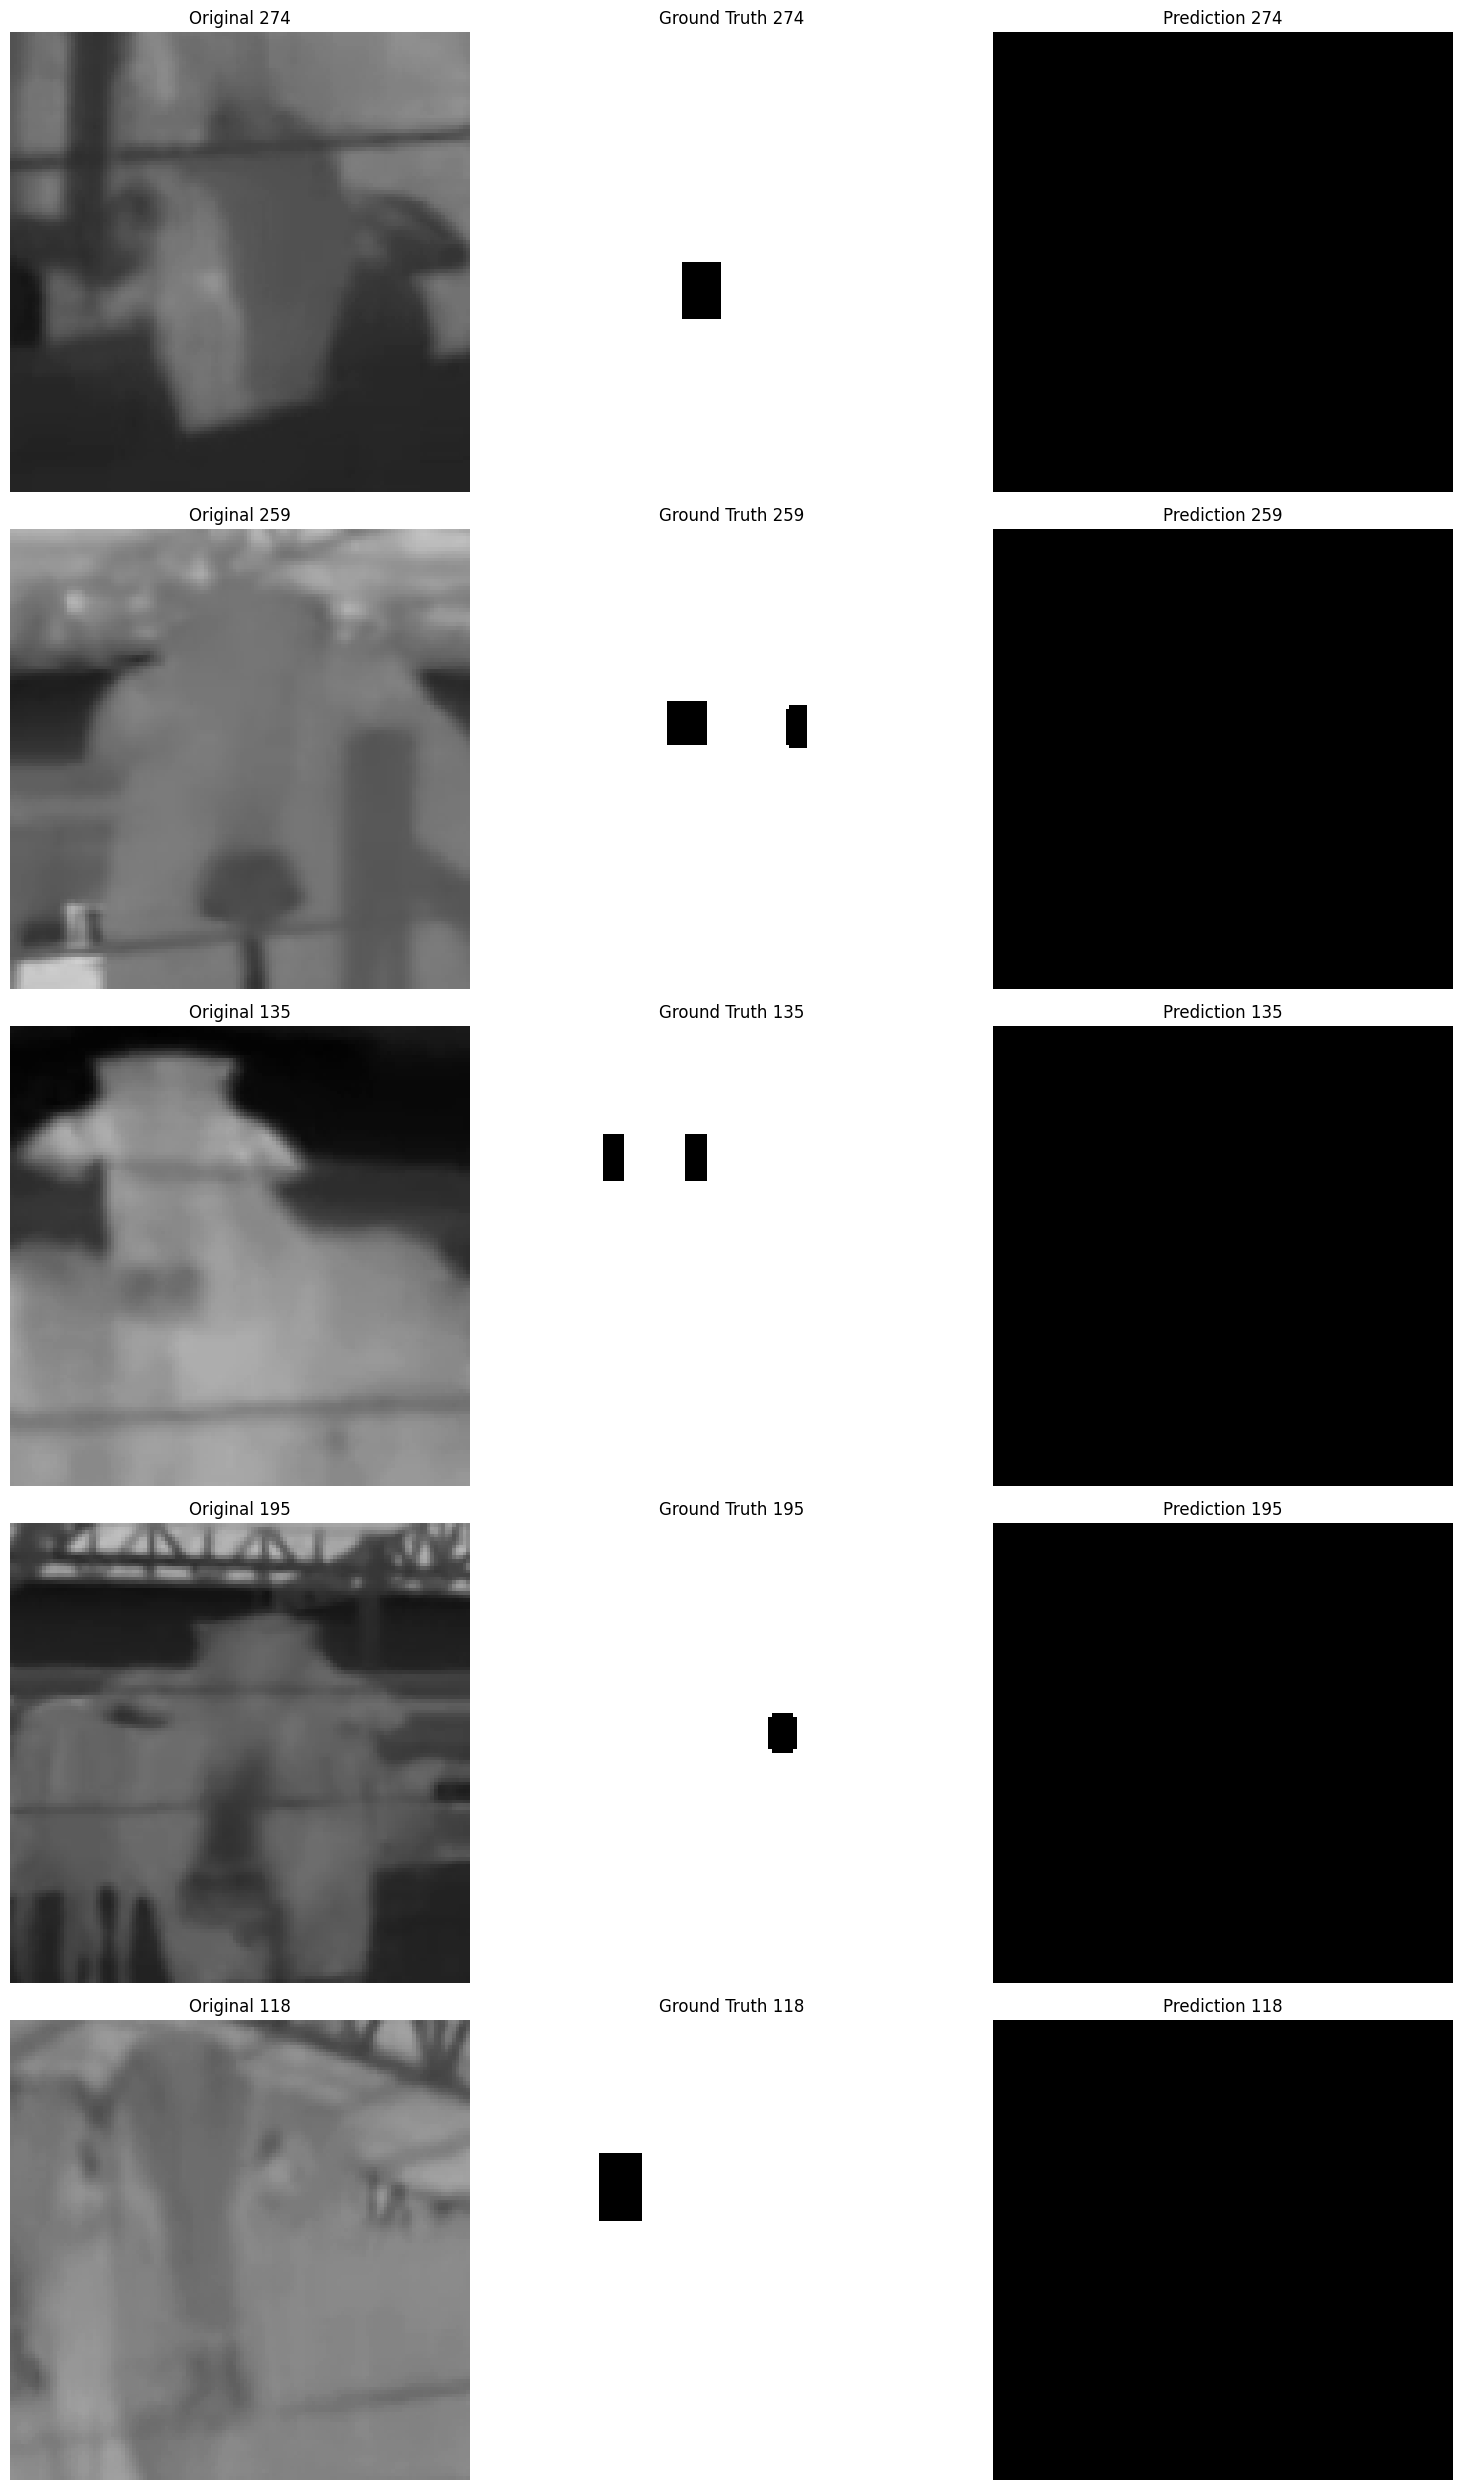

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def binarize_output(y_pred, threshold=0.5):
    # Assume que y_pred tem shape (batch_size, height, width, 3)
    # Converte para escala de cinza tomando a média dos canais
    y_pred_gray = tf.reduce_mean(y_pred, axis=-1)
    # Aplica o threshold
    return tf.cast(y_pred_gray > threshold, tf.float32)

def visualize_predictions(X_test, y_true, y_pred, num_samples=5):
    indices = np.random.choice(X_test.shape[0], num_samples, replace=False)

    plt.figure(figsize=(15, 5*num_samples))

    for i, idx in enumerate(indices):
        # Imagem original
        plt.subplot(num_samples, 3, i*3 + 1)
        plt.imshow(X_test[idx], cmap='gray')
        plt.title(f"Original {idx}")
        plt.axis('off')

        # Ground truth
        plt.subplot(num_samples, 3, i*3 + 2)
        plt.imshow(y_true[idx, ..., 0], cmap='gray')  # Assume que y_true é (batch, height, width, 1)
        plt.title(f"Ground Truth {idx}")
        plt.axis('off')

        # Predição
        plt.subplot(num_samples, 3, i*3 + 3)
        plt.imshow(y_pred[idx], cmap='gray')
        plt.title(f"Prediction {idx}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Carregue o modelo e faça as predições
model = tf.keras.models.load_model('unet_boi_olhos_compact_loss_2.h5',
                                   custom_objects={'loss': cluster_aware_focal_loss()})

y_pred = model.predict(X_test_final)
y_pred_binary = binarize_output(y_pred)

# Visualize os resultados
visualize_predictions(X_test_final, y_test_final, y_pred_binary)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.backend as K

def cluster_aware_focal_loss(alpha=0.25, gamma=2, spatial_weight=1):
    def loss(y_true, y_pred):
        epsilon = K.epsilon()
        y_pred = K.clip(y_pred, epsilon, 1. - epsilon)

        # Focal Loss
        focal_loss = -alpha * K.pow(1 - y_pred, gamma) * y_true * K.log(y_pred) - \
                     (1 - alpha) * K.pow(y_pred, gamma) * (1 - y_true) * K.log(1 - y_pred)

        # Cluster awareness
        height, width = K.int_shape(y_pred)[1:3]
        y_coords, x_coords = tf.meshgrid(tf.range(height, dtype=tf.float32),
                                         tf.range(width, dtype=tf.float32),
                                         indexing='ij')
        coords = tf.stack([y_coords, x_coords], axis=-1)

        def calculate_centroid(mask):
            total_mass = K.sum(mask, axis=[1, 2]) + epsilon
            weighted_y = K.sum(y_coords[..., tf.newaxis] * mask, axis=[1, 2]) / total_mass
            weighted_x = K.sum(x_coords[..., tf.newaxis] * mask, axis=[1, 2]) / total_mass
            return tf.stack([weighted_y, weighted_x], axis=-1)

        true_centroids = calculate_centroid(y_true)
        pred_centroids = calculate_centroid(y_pred)

        centroid_distance = K.sqrt(K.sum(K.square(true_centroids - pred_centroids), axis=-1))

        # Penalize based on distance from true centroid
        pixel_distances = K.sqrt(K.sum(K.square(coords[..., tf.newaxis, :] - true_centroids[:, tf.newaxis, tf.newaxis, :]), axis=-1))
        distance_penalty = pixel_distances * K.abs(y_true - y_pred)

        total_loss = focal_loss + spatial_weight * distance_penalty

        return K.mean(total_loss)

    return loss

def conv_block(input_tensor, num_filters):
    x = Conv2D(num_filters, 3, padding='same', use_bias=False)(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    return x

def compact_unet(input_size=(128, 128, 3)):
    inputs = Input(input_size)

    # Encoder (Downsampling)
    conv1 = conv_block(inputs, 32)   # Aumentado de 16 para 64 filtros
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = conv_block(pool1, 64)   # Aumentado de 32 para 128 filtros
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = conv_block(pool2, 128)   # Nova camada, 256 filtros
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    # Bridge
    conv4 = conv_block(pool3, 256)   # Aumentado de 64 para 512 filtros

    # Decoder (Upsampling)
    up5 = UpSampling2D(size=(2, 2))(conv4)
    up5 = concatenate([up5, conv3])
    conv5 = conv_block(up5, 128)     # Nova camada, 256 filtros

    up6 = UpSampling2D(size=(2, 2))(conv5)
    up6 = concatenate([up6, conv2])
    conv6 = conv_block(up6, 64)     # Aumentado de 32 para 128 filtros

    up7 = UpSampling2D(size=(2, 2))(conv6)
    up7 = concatenate([up7, conv1])
    conv7 = conv_block(up7, 32)      # Aumentado de 16 para 64 filtros

    outputs = Conv2D(3, 1, activation='sigmoid')(conv7)

    model = Model(inputs=inputs, outputs=outputs)
    return model

# Create and compile the model
model = compact_unet()
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss=cluster_aware_focal_loss(),
              metrics=['accuracy'])

model.summary()

# Verificar as formas dos dados
print("X_train_final shape:", X_train_final.shape)
print("y_train_final shape:", y_train_final.shape)

# Treinamento do modelo
history = model.fit(
    X_train_final, y_train_final,
    batch_size=32,
    epochs=45,
    validation_split=0.2,
    callbacks=[
        tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.2, patience=5, min_lr=1e-7, mode='max'),
        tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=15, restore_best_weights=True, mode='max'),
        tf.keras.callbacks.ModelCheckpoint('unet_boi_olhos_compact.h5', save_best_only=True, monitor='val_accuracy', mode='max')
    ]
)

model.save('unet_boi_olhos_compact_more_epochs.h5')

Model: "model_33"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_35 (InputLayer)       [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 conv2d_228 (Conv2D)         (None, 128, 128, 32)         864       ['input_35[0][0]']            
                                                                                                  
 batch_normalization_198 (B  (None, 128, 128, 32)         128       ['conv2d_228[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_198 (Activation  (None, 128, 128, 32)         0         ['batch_normalization_1

16/16 [==============================] - 3s 183ms/step


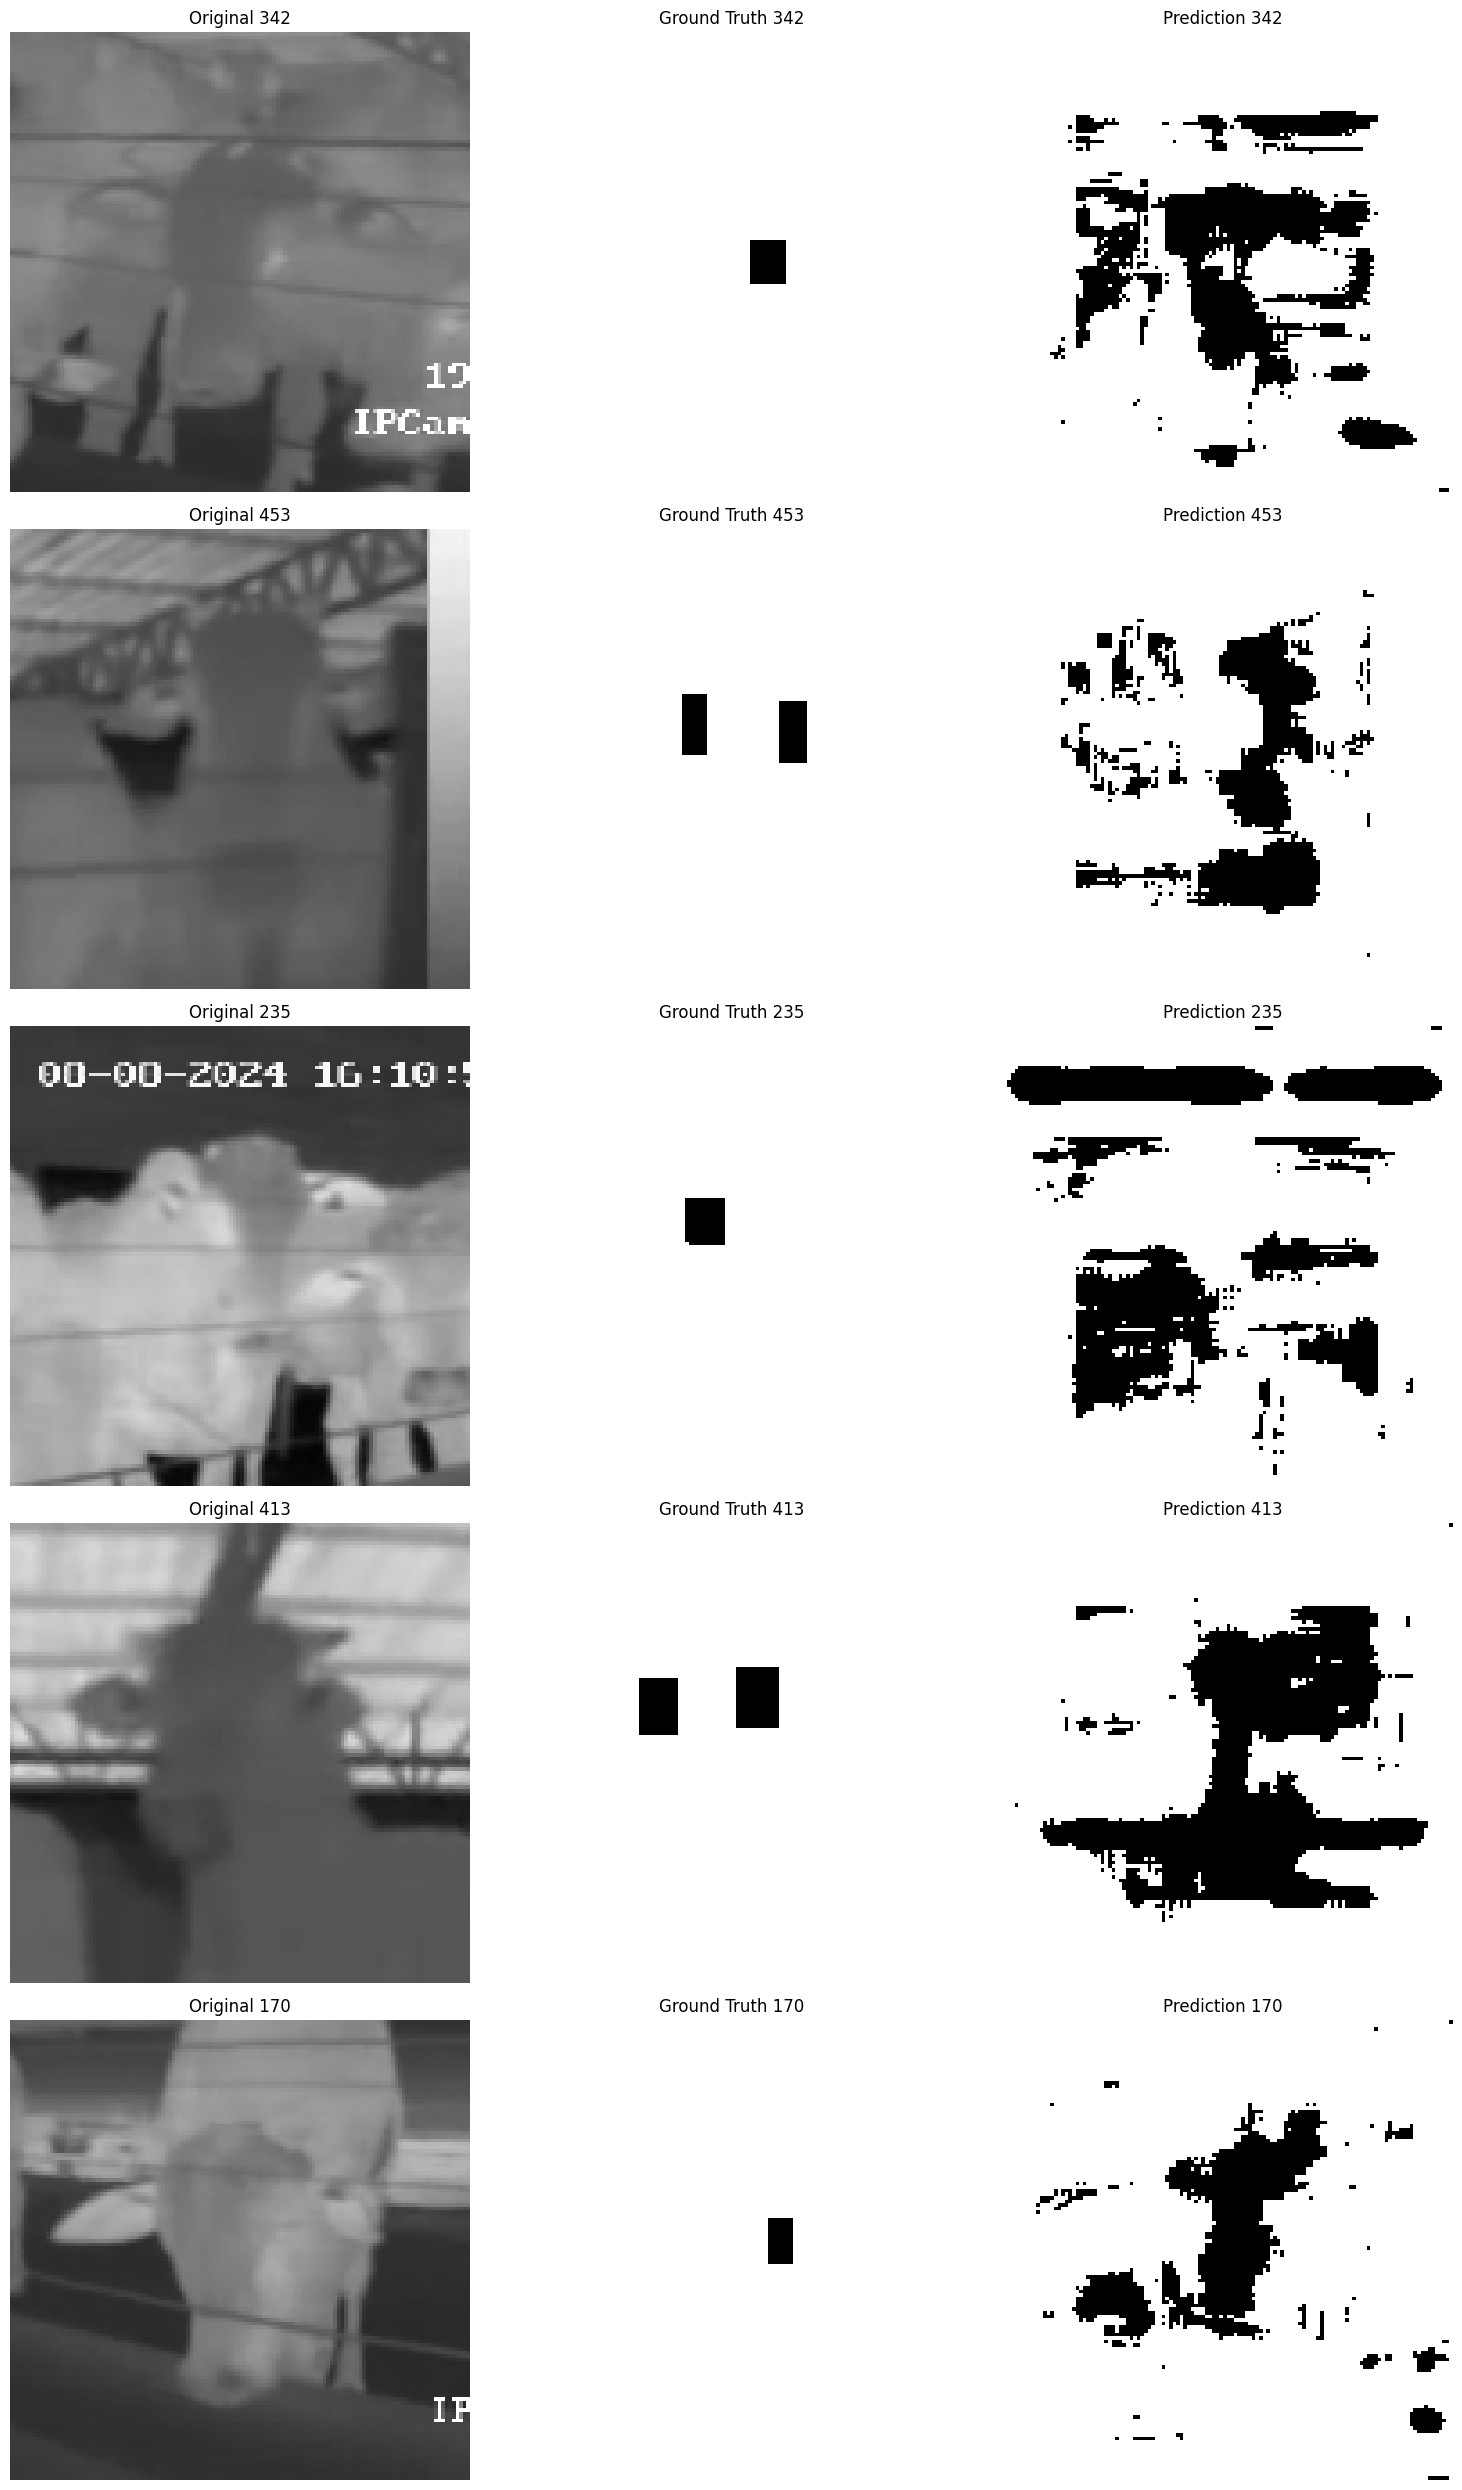

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def binarize_output(y_pred, threshold=0.5):
    # Assume que y_pred tem shape (batch_size, height, width, 3)
    # Converte para escala de cinza tomando a média dos canais
    y_pred_gray = tf.reduce_mean(y_pred, axis=-1)
    # Aplica o threshold
    return tf.cast(y_pred_gray > threshold, tf.float32)

def visualize_predictions(X_test, y_true, y_pred, num_samples=5):
    indices = np.random.choice(X_test.shape[0], num_samples, replace=False)

    plt.figure(figsize=(15, 5*num_samples))

    for i, idx in enumerate(indices):
        # Imagem original
        plt.subplot(num_samples, 3, i*3 + 1)
        plt.imshow(X_test[idx], cmap='gray')
        plt.title(f"Original {idx}")
        plt.axis('off')

        # Ground truth
        plt.subplot(num_samples, 3, i*3 + 2)
        plt.imshow(y_true[idx, ..., 0], cmap='gray')  # Assume que y_true é (batch, height, width, 1)
        plt.title(f"Ground Truth {idx}")
        plt.axis('off')

        # Predição
        plt.subplot(num_samples, 3, i*3 + 3)
        plt.imshow(y_pred[idx], cmap='gray')
        plt.title(f"Prediction {idx}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Carregue o modelo e faça as predições
model = tf.keras.models.load_model('unet_boi_olhos_compact_more_epochs.h5',
                                   custom_objects={'loss': spatial_weighted_focal_loss()})

y_pred = model.predict(X_test_final)
y_pred_binary = binarize_output(y_pred)

# Visualize os resultados
visualize_predictions(X_test_final, y_test_final, y_pred_binary)